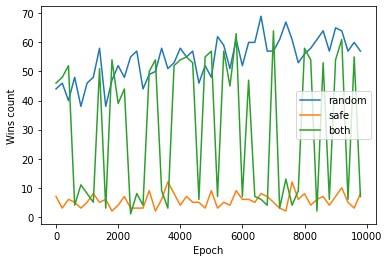

Testing Against Safe Trained vs both
(65, 783, 152)
Testing Against random Trained vs both
(621, 283, 96)
Testing Against Both Trained vs both
(593, 325, 82)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random

class board_environment(object):
  def __init__(self,n):
    self.n=n
    self.environment=np.zeros((n,n))
    self.end=False
    agent_value=1
    opponent_value=-1
  
  def act(self,action,value):
    i=action[0]
    j=action[1]
    self.environment[i][j]=value

  def prints(self):
    print(self.environment)
    
  def reset(self):
    self.environment=np.zeros((self.n,self.n))
    self.end=False

  def state(self):
    l=[]
    for i in range(self.n):
      for j in range(self.n):
        l.append(self.environment[i][j])
    return str(l)

  def available_actions(self):
    actions=[]
    for i in range(self.n):
      for j in range(self.n):
        if self.environment[i][j]==0:
          actions.append((i,j))
    return actions

  def rowsum(self):
    row_sum=[]
    accumulator=0
    for i in range(self.n):
      accumulator=0
      for j in range(self.n):
        accumulator+=self.environment[i][j]
      row_sum.append(accumulator)
    return row_sum

  def columnsum(self):
    column_sum=[]
    for i in range(self.n):
      accumulator=0
      for j in range(self.n):
        accumulator+=self.environment[j][i]
      column_sum.append(accumulator)
    return column_sum

  def diagsum(self):
    diag_sum=[]
    accumulator=0
    for i in range(self.n):
      accumulator+=self.environment[i][i]
    diag_sum.append(accumulator)
    accumulator=0
    for i in range(self.n):
      accumulator+=self.environment[i][self.n-i-1]
    diag_sum.append(accumulator)
    return diag_sum
  
  def gameover(self):
    row_sum=self.rowsum()
    column_sum=self.columnsum()
    diag_sum=self.diagsum()
    if self.n in row_sum:
      self.end=True
      return 1
    elif self.n in column_sum:
      self.end=True
      return 1
    elif self.n in diag_sum:
      self.end=True
      return 1
    elif -self.n in row_sum:
      self.end=True
      return -1
    elif -self.n in column_sum:
      self.end=True
      return -1
    elif -self.n in diag_sum:
      self.end=True
      return -1
    elif len(self.available_actions())==0:
      self.end=True
      return 0
    return 3
class random_agent(object):
  def __init__(self):
    pass
  def policy(self,board):
    actions=board.available_actions()
    return random.choice(actions)
class safe_agent(object):
  def __init__(self):
    pass
  def policy(self,board):
    row_sum=board.rowsum()
    column_sum=board.columnsum()
    diag_sum=board.diagsum()
    diag1 = [board.environment[i, i] for i in range(board.n)]
    diag2 = [board.environment[i, board.n-i-1] for i in range(board.n)]
    for i in range(board.n):
      if (-row_sum[i]==board.n-1):
        action=(i,list(board.environment[i, :]).index(0))
        return action
      elif (-column_sum[i]==board.n-1):
        action=(list(board.environment[:,i]).index(0),i)
        return action
    if(-diag_sum[0]==board.n-1):
      return (diag1.index(0),diag1.index(0))
    elif(-diag_sum[1]==board.n-1):
     return (diag2.index(0),board.n-diag2.index(0)-1)
    for i in range(board.n):
      if row_sum[i]==board.n-1:
        action=(i,list(board.environment[i, :]).index(0))
        return action
      elif column_sum[i]==board.n-1:
        action=(list(board.environment[:,i]).index(0),i)
        return action
    if(diag_sum[0]==board.n-1):
      return (diag1.index(0),diag1.index(0))
    elif(diag_sum[1]==board.n-1):
      return (diag2.index(0),board.n-diag2.index(0)-1)
    else:
      actions=board.available_actions()
      action=random.choice(actions) 
    return action
class q_learning(object):
  def __init__(self):
    self.eps=0.05
    self.alpha=0.01
    self.gamma=0.9
    self.table={}
  def eps_policy(self,board):
    prob=np.random.random()
    actions=board.available_actions()
    #print(prob)
    if prob < self.eps:
      return random.choice(actions)
    else:
      return self.policy(board)
      
  def policy(self,board):
    action= self.argmax_a_Q(board)
    return action

  def argmax_a_Q(self,board):
    s=board.state()
    actions=board.available_actions()
    if len(actions)!=0:
      max_value=max([self.Q_value(s,a) for a in actions])
      argmax_a = [a for a in actions if self.Q_value(s,a) == max_value]
      return random.choice(argmax_a)
    return None

  def Q_value(self,s,a):
    if (s,a) in self.table:
      return self.table[(s,a)]
    self.table[(s,a)]=0
    return self.table[(s,a)]
    
  def learning_Q_table(self,board,s1,a,s2):
    actions=board.available_actions()
    if len(actions)!=0:
      max_value = max([self.Q_value(s2, a) for a in actions])
    else:
      max_value=0
    reward=board.gameover()
    if(reward!=3 and reward!=0):
      reward*=10
    elif(reward==0):
      reward=1
    else:
      reward=0
    #print(reward)
    target_Q_value=reward+self.gamma*max_value
    update_difference=target_Q_value-self.Q_value(s1,a)
    self.table[(s1,a)]+=self.alpha*update_difference
def testing(board,agent,opponent1,iterations):
  opponent=random.choice(opponent1)
  wins=0
  ties=0
  loses=0
  for i in range(iterations):
    result=play_game(board,agent,opponent)
    if(result==1):
      wins+=1
    elif(result==0):
      ties+=1
    elif(result==-1):
      loses+=1
  return (wins,loses,ties)
def play_game(board,agent,opponent):
  board.reset()
  #toss a coin for first move
  first_turn=np.random.choice([-1,1])
  if first_turn==-1:
    counter=0
    while (board.gameover()==3):
      if counter%2==0:
        action=opponent.policy(board)
        board.act(action,-1)
      else:
        action=agent.policy(board)
        #print(action is None)
        board.act(action,1)  
      counter+=1  
  else:
    counter=0
    while (board.gameover()==3):
      if counter%2==0:
        action=agent.policy(board)
        #print(action is None)
        board.act(action,1)
      else:
        action=opponent.policy(board)
        board.act(action,-1)
      counter+=1
  #print(board.gameover())
  return board.gameover() 
def training(board,agent,opponent1):
  iterations=10000
  data=[]
  for i in range(iterations):
    board.reset()
    opponent=random.choice(opponent1)
    first_turn=np.random.choice([-1,1])
    if first_turn==-1:
      counter=0
      while (board.gameover()==3):
        s1=board.state()
        if counter%2==0:
          action=opponent.policy(board)
          board.act(action,-1)
          s2=board.state()
          #print(action)
        else:
          agentaction=agent.eps_policy(board)
          #print(action)
          board.act(agentaction,1)
          s2=board.state() 
        counter+=1 
      agent.learning_Q_table(board,s1,agentaction,s2)  
    else:
      counter=0
      while (board.gameover()==3):
        s1=board.state()
        if counter%2==0:
          agentaction=agent.eps_policy(board)
          board.act(agentaction,1)
          s2=board.state() 
        else:
          action=opponent.policy(board)
          #print(action)
          board.act(action,-1)
          s2=board.state()
        counter+=1
      agent.learning_Q_table(board,s1,agentaction,s2)

    if(i%200==0):
      #print(agent.table)
      data.append(testing(board,agent,opponent1,100))
  return data
def plot(rand_data,safe_data,both_data):
  plt.xlabel("Epoch")
  plt.ylabel("Wins count")
  rand_data1=[]
  safe_data1=[]
  both_data1=[]
  for i in range(len(rand_data)):
    rand_data1.append(rand_data[i][0])
    safe_data1.append(safe_data[i][0])
    both_data1.append(both_data[i][0])
  #print(rand_data1,safe_data1,both_data1)
  epochs = np.arange(0,10000,200)
  plt.plot(epochs, rand_data1, label = "random")
  plt.plot(epochs, safe_data1, label = "safe")
  plt.plot(epochs, both_data1, label = "both")
  plt.legend()
  plt.show()
def main():
  board=board_environment(3)
  #print("training against random opponent")
  rand_agent=q_learning()
  rand_opponent=random_agent()
  rand_data=training(board,rand_agent,[rand_opponent])
  #print(rand_agent.table)

  #print("training against safe opponents")
  safeagent=q_learning()
  safe_opponent=safe_agent()
  safe_data=training(board,safeagent,[safe_opponent])

  #print("training against both opponents")
  both_agent=q_learning()
  both_data=training(board,both_agent,[safe_opponent,rand_opponent])
  #print(rand_data,safe_data,both_data)
  plot(rand_data,safe_data,both_data)

  print("Testing Against Safe Trained vs both")
  safvsboth=testing(board,safeagent,[safe_opponent,rand_opponent],1000)
  print(safvsboth)

  print("Testing Against random Trained vs both")
  randvsboth=testing(board,rand_agent,[safe_opponent,rand_opponent],1000)
  print(randvsboth)

  print("Testing Against Both Trained vs both")
  bothvsboth=testing(board,both_agent,[safe_opponent,rand_opponent],1000)
  print(bothvsboth)

main()

2.4 As the number of training iterations increased over 100000 even training with safe agent was good. And the **agent trained by both agents** performs better than other 2 as number of training iterations increase.
 
2.5 No The agent trained is not unbeatable. But number of wins can be increased by more training and tuning hyperparameters.